In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
currency_data=pd.read_csv("C:\\Users\\kotha\\OneDrive\\Desktop\\dataset.csv")

In [4]:
currency_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-20,74.449303,74.652496,74.296501,74.449203,74.449203,0
1,2022-01-21,74.438499,74.629997,74.294403,74.452202,74.452202,0
2,2022-01-24,74.420303,74.742699,74.316101,74.413200,74.413200,0
3,2022-01-25,74.644897,74.834801,74.538498,74.644798,74.644798,0
4,2022-01-26,74.779999,75.001503,74.685997,74.779999,74.779999,0


In [5]:
currency_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
257,2023-01-16,81.278000,81.736099,81.129501,81.278000,81.278000,0
258,2023-01-17,81.652603,81.874001,81.542000,81.652603,81.652603,0
259,2023-01-18,81.525497,81.817001,81.155502,81.525497,81.525497,0
260,2023-01-19,81.435997,81.559303,81.225800,81.435997,81.435997,0
261,2023-01-20,81.259003,81.360001,81.095001,81.222504,81.222504,0


In [21]:
currency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [23]:
currency_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [25]:
currency_data.shape


(262, 7)

In [26]:
currency_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,78.986456,79.285799,78.795209,78.985002,78.985002,0.0
std,2.619583,2.636346,2.604530,2.621220,2.621220,0.0
min,74.420303,74.629997,74.294403,74.413200,74.413200,0.0
25%,76.476673,76.769722,76.307324,76.476673,76.476673,0.0
50%,79.364052,79.735248,79.126248,79.364052,79.364052,0.0
75%,81.513748,81.824348,81.270948,81.513748,81.513748,0.0
max,82.997002,83.386002,82.740997,82.997002,82.997002,0.0


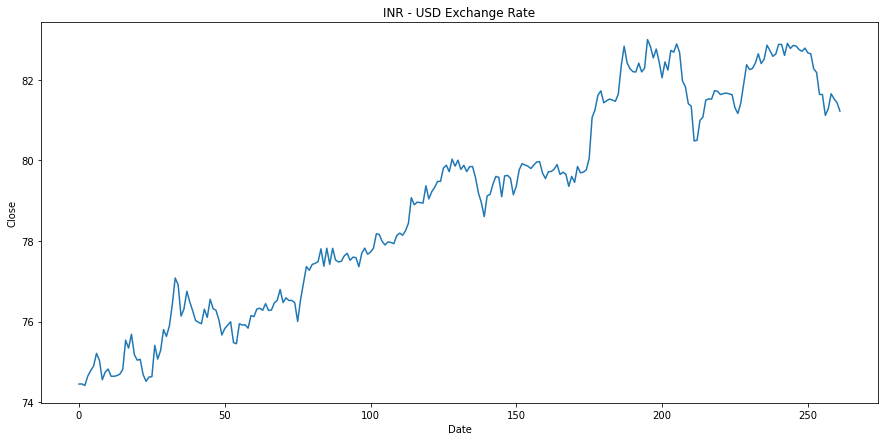

In [28]:
plt.figure(figsize=(15, 7))
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(currency_data["Close"])
plt.show()

In [11]:
print(currency_data.corr())

               Open      High       Low     Close  Adj Close  Volume
Open       1.000000  0.997564  0.997864  0.999974   0.999974     NaN
High       0.997564  1.000000  0.996937  0.997579   0.997579     NaN
Low        0.997864  0.996937  1.000000  0.997856   0.997856     NaN
Close      0.999974  0.997579  0.997856  1.000000   1.000000     NaN
Adj Close  0.999974  0.997579  0.997856  1.000000   1.000000     NaN
Volume          NaN       NaN       NaN       NaN        NaN     NaN


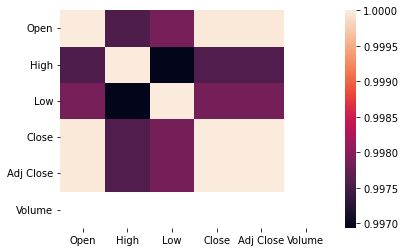

In [12]:
sns.heatmap(currency_data.corr())
plt.show()

In [13]:
#Now the next step is to prepare the dataset by storing the most relevant features in the variable x and storing the target 
#column in the variable y:

In [14]:
x = currency_data[["Open", "High", "Low"]]
y = currency_data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [15]:
#Now let’s split the dataset and train a currency exchange prediction model using the Decision Tree 
#Regression model using Python:

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [38]:
print(x_train)

[[81.724602 82.112999 81.496101]
 [78.8983   79.108002 78.838699]
 [77.360497 77.686401 77.389801]
 [82.644699 82.911903 82.365402]
 [76.121696 76.329498 76.056999]
 [75.538399 75.539299 75.094002]
 [75.945099 76.154503 75.774597]
 [79.552902 79.779999 79.261002]
 [82.825699 83.220001 82.562302]
 [81.899002 82.600197 81.691498]
 [77.486298 77.913498 77.480003]
 [81.4655   81.826797 81.265999]
 [76.490097 76.981499 76.304497]
 [79.410599 79.757004 79.313004]
 [77.985497 78.218498 77.964996]
 [82.279198 82.508301 82.073997]
 [76.957497 77.518997 76.927498]
 [78.939499 79.420998 78.914497]
 [81.480598 81.697601 81.0998  ]
 [79.571503 79.656502 79.173698]
 [79.6558   79.741997 79.324997]
 [77.692001 77.829498 77.462799]
 [79.807503 80.218697 79.598099]
 [79.9179   80.1548   79.762001]
 [77.372398 77.745003 77.276497]
 [82.636902 82.9562   82.5495  ]
 [79.368401 79.548302 78.929901]
 [79.601898 79.814697 79.442101]
 [76.794098 77.038002 76.4879  ]
 [74.420303 74.742699 74.316101]
 [79.47640

In [39]:
print(y_test)

[[82.706001]
 [81.4953  ]
 [82.2864  ]
 [79.355301]
 [76.285202]
 [79.194801]
 [80.050697]
 [81.435997]
 [74.745499]
 [79.073196]
 [74.623001]
 [81.305298]
 [76.323502]
 [82.681801]
 [82.412804]
 [82.180099]
 [77.2714  ]
 [75.209297]
 [81.405197]
 [76.463501]
 [79.118301]
 [79.613998]
 [75.174797]
 [80.991997]
 [78.142403]
 [79.359703]
 [77.365501]
 [76.527802]
 [77.497299]
 [74.808899]
 [75.630997]
 [82.194702]
 [82.253502]
 [78.134903]
 [77.080803]
 [81.648804]
 [76.524101]
 [82.581902]
 [81.825996]
 [74.822403]
 [82.785698]
 [76.552399]
 [78.950699]
 [76.001602]
 [74.633003]
 [79.682297]
 [82.413002]
 [75.685402]
 [77.421097]
 [79.1549  ]
 [82.835098]
 [79.453697]
 [78.441101]]


In [29]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [20]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.head())

   Predicted Rate
0       82.725998
1       81.495003
2       82.279198
3       79.368401
4       76.278503


In [40]:
data = pd.DataFrame(data={"Predicted Rate": ypred.flatten()})
print(data.tail())

    Predicted Rate
48       77.418404
49       79.146004
50       82.851997
51       79.476402
52       78.604500
